<a href="https://colab.research.google.com/github/dmod99/COVID19_Predict/blob/main/data_3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imorting all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
import statistics

In [ ]:
#read and shuffle data
df = pd.read_csv("/content/Dataset-3 (1).csv")
df = df.sample(frac = 1,random_state=2)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Patient_ID', 'Platelets', 'Leukocytes', 'Eosinophils',
       'Monocytes', 'SARS-Cov-2_exam_result'],
      dtype='object')

In [ ]:
df

,Unnamed: 0,Patient_ID,Platelets,Leukocytes,Eosinophils,Monocytes,SARS-Cov-2_exam_result
292,292,1f6aefe93dc5311,-0.580222,-0.261578,-0.414114,0.804021,0
141,141,b2366c90eec2924,1.203555,-0.486984,1.187183,-0.062665,0
131,131,5c50590b1103c00,0.600588,-0.503681,0.386534,-1.612194,0
453,453,6a8d40ea05031e8,-0.241053,2.231804,-0.414114,-1.270772,0
176,176,8911dde49eac91b,0.273981,-0.837616,8.350876,-0.640455,0
134,134,2da9801abb49678,0.085554,-0.692910,0.007280,-0.272770,0
368,368,f010f8dc5b6cc19,0.537779,0.634481,-0.835508,-1.480878,0
152,152,0cd8fd5c5bc3c52,1.643218,-0.069565,-0.624811,-0.876824,0
123,123,5c30f2f53f06d09,-0.052626,0.038964,-0.161278,-0.246507,0
563,563,9553886457728b3,-0.178244,-0.528726,-0.751229,-0.088928,1


In [ ]:
df['SARS-Cov-2_exam_result'].value_counts()

0    519
1     83
Name: SARS-Cov-2_exam_result, dtype: int64

In [ ]:
df.shape

(602, 7)

In [ ]:
#dropping id column as it is not a valid attribute to train model
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['Patient_ID'], axis = 1)

In [ ]:
df

,Platelets,Leukocytes,Eosinophils,Monocytes,SARS-Cov-2_exam_result
292,-0.580222,-0.261578,-0.414114,0.804021,0
141,1.203555,-0.486984,1.187183,-0.062665,0
131,0.600588,-0.503681,0.386534,-1.612194,0
453,-0.241053,2.231804,-0.414114,-1.270772,0
176,0.273981,-0.837616,8.350876,-0.640455,0
134,0.085554,-0.692910,0.007280,-0.272770,0
368,0.537779,0.634481,-0.835508,-1.480878,0
152,1.643218,-0.069565,-0.624811,-0.876824,0
123,-0.052626,0.038964,-0.161278,-0.246507,0
563,-0.178244,-0.528726,-0.751229,-0.088928,1


In [ ]:
df.isnull().any()

Platelets                 False
Leukocytes                False
Eosinophils               False
Monocytes                  True
SARS-Cov-2_exam_result    False
dtype: bool

In [ ]:
#df = df.fillna(lambda x: x.median())

In [ ]:
data = df.to_numpy()

data.shape

(602, 5)

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(data)
#X_2 = X
SimpleImputer()
data = imp.transform(data)

data

array([[-0.58022207, -0.26157784, -0.41411391,  0.80402118,  0.        ],
       [ 1.20355487, -0.48698398,  1.18718266, -0.06266452,  0.        ],
       [ 0.60058802, -0.50368071,  0.38653433, -1.61219394,  0.        ],
       ...,
       [-0.15312053,  0.12523021,  3.67340589, -0.48287594,  0.        ],
       [-0.64303112, -0.57325047, -0.54053205,  0.54138905,  0.        ],
       [-0.21592958, -0.57325047, -0.70908952,  2.53739309,  1.        ]])

In [ ]:
#splitting into 7 folds
data_g = np.array_split(data, 7)

## **LOGISTIC REGRESSION**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8231981981981982
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.89      0.99      0.94        74
Covid Positive       0.75      0.25      0.38        12

      accuracy                           0.88        86
     macro avg       0.82      0.62      0.66        86
  weighted avg       0.87      0.88      0.86        86

------------------TRAINING-----------------
                precision    recall  f1-score   support

Covid Negative       0.88      0.96      0.92       445
Covid Positive       0.41      0.15      0.22        71

      accuracy                           0.85       516
     macro avg       0.64      0.56      0.57       516
  weighted avg       0.81      0.85      0.82       516



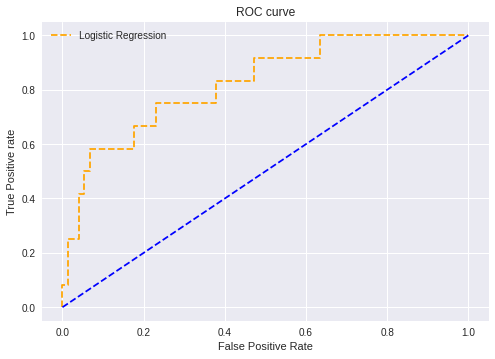

In [ ]:
accuracy_log_test = []
accuracy_log_train = []
classif_log_test=[]
classif_log_train=[]

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:4])
                train_data_y.append(data_g[j][w][4])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:4])
                test_data_y.append(data_g[j][w][4])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn 
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)
    arr_2d = np.reshape(test_data_yn, (86, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)
    finaldf.to_csv("Dataset3-logistic-regression-test-results.csv")
    
    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    #calculating and appending accuracies
    acc1_log = accuracy_score(test_data_yn, test_pred_y_log)
    accuracy_log_test.append(acc1_log)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))
    print("------------------TRAINING-----------------")
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    accuracy_log_train.append(acc2_log)
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(train_data_yn, train_pred_y_log, target_names=target_names))


In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(test_data_yn, test_pred_y_log)
cm

array([[73,  1],
       [ 9,  3]])

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))


Mean accuracy for test set =  0.8837209302325582
Mean accuracy for train set =  0.8527131782945736


# **NAIVE BAYES**

0.7792792792792793
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.92      0.82      0.87        74
Covid Positive       0.35      0.58      0.44        12

      accuracy                           0.79        86
     macro avg       0.64      0.70      0.65        86
  weighted avg       0.84      0.79      0.81        86



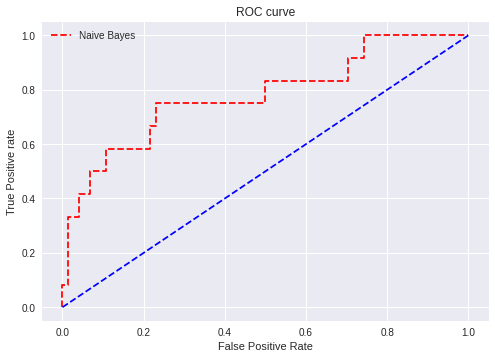

In [ ]:
accuracy_nb_test = []
accuracy_nb_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:4])
                train_data_y.append(data_g[j][w][4])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:4])
                test_data_y.append(data_g[j][w][4])
       
    #convert into array         
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)

    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)
    arr_2d = np.reshape(test_data_yn, (86, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)
    finaldf.to_csv("Dataset3-naive-bayes-test-results.csv")
    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr2, tpr2, thresh2 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_nb = clf.predict(test_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_nb = accuracy_score(test_data_yn, test_pred_y_nb)
    accuracy_nb_test.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    accuracy_nb_train.append(acc2_nb)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))

Mean accuracy for test set =  0.7906976744186046
Mean accuracy for train set =  0.8449612403100775


# ***Fisher Linear Discriminant***

0.8603603603603603
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.87      1.00      0.93        74
Covid Positive       1.00      0.08      0.15        12

      accuracy                           0.87        86
     macro avg       0.94      0.54      0.54        86
  weighted avg       0.89      0.87      0.82        86



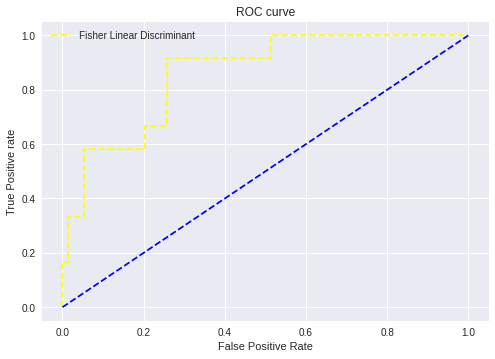

In [ ]:
accuracy_fl_test = []
accuracy_fl_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:4])
                train_data_y.append(data_g[j][w][4])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:4])
                test_data_y.append(data_g[j][w][4])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)
    pred_prob1 = clf.predict_proba(test_data_xn)
    arr_2d = np.reshape(test_data_yn, (86, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)
    finaldf.to_csv("Dataset3-Fischer's-linear-discriminant-test-results.csv")
    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr3, tpr3, thresh3 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_fl = clf.predict(test_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_fl = accuracy_score(test_data_yn, test_pred_y_fl)
    accuracy_fl_test.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    accuracy_fl_train.append(acc2_fl)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_fl_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_fl_train))

Mean accuracy for test set =  0.872093023255814
Mean accuracy for train set =  0.8507751937984496


# **KNN**

In [ ]:
df

,Platelets,Leukocytes,Eosinophils,Monocytes,SARS-Cov-2_exam_result
292,-0.580222,-0.261578,-0.414114,0.804021,0
141,1.203555,-0.486984,1.187183,-0.062665,0
131,0.600588,-0.503681,0.386534,-1.612194,0
453,-0.241053,2.231804,-0.414114,-1.270772,0
176,0.273981,-0.837616,8.350876,-0.640455,0
134,0.085554,-0.692910,0.007280,-0.272770,0
368,0.537779,0.634481,-0.835508,-1.480878,0
152,1.643218,-0.069565,-0.624811,-0.876824,0
123,-0.052626,0.038964,-0.161278,-0.246507,0
563,-0.178244,-0.528726,-0.751229,-0.088928,1


In [ ]:
y=df[['SARS-Cov-2_exam_result']] 
y

,SARS-Cov-2_exam_result
292,0
141,0
131,0
453,0
176,0
134,0
368,0
152,0
123,0
563,1


In [ ]:
x=df[['Platelets','Leukocytes','Eosinophils','Monocytes']]
x

,Platelets,Leukocytes,Eosinophils,Monocytes
292,-0.580222,-0.261578,-0.414114,0.804021
141,1.203555,-0.486984,1.187183,-0.062665
131,0.600588,-0.503681,0.386534,-1.612194
453,-0.241053,2.231804,-0.414114,-1.270772
176,0.273981,-0.837616,8.350876,-0.640455
134,0.085554,-0.692910,0.007280,-0.272770
368,0.537779,0.634481,-0.835508,-1.480878
152,1.643218,-0.069565,-0.624811,-0.876824
123,-0.052626,0.038964,-0.161278,-0.246507
563,-0.178244,-0.528726,-0.751229,-0.088928


In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(x)
#X_2 = X
SimpleImputer()
X = imp.transform(x)
X

array([[-0.58022207, -0.26157784, -0.41411391,  0.80402118],
       [ 1.20355487, -0.48698398,  1.18718266, -0.06266452],
       [ 0.60058802, -0.50368071,  0.38653433, -1.61219394],
       ...,
       [-0.15312053,  0.12523021,  3.67340589, -0.48287594],
       [-0.64303112, -0.57325047, -0.54053205,  0.54138905],
       [-0.21592958, -0.57325047, -0.70908952,  2.53739309]])

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7724867724867726


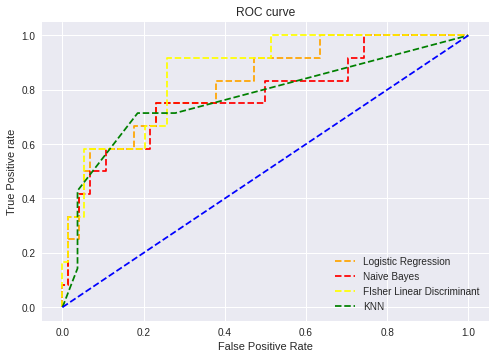

In [ ]:
#Fitting K-NN classifier to the training set
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)
#importing model from sklearn 
    
    #predict class
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

arr_2d = np.reshape(y_test, (61, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset3-KNN-test-results.csv")

from sklearn.metrics import roc_curve
arr_2d = np.reshape(y_test, (61, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset3-KNN-test-results.csv")
    # roc curve for models
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

    # matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)

In [ ]:
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 90.16%
The Confusion Matrix is:
  [[52  2]
 [ 4  3]]
                precision    recall  f1-score   support

Covid Negative       0.93      0.96      0.95        54
Covid Positive       0.60      0.43      0.50         7

      accuracy                           0.90        61
     macro avg       0.76      0.70      0.72        61
  weighted avg       0.89      0.90      0.89        61



In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(scale_pos_weight = 0.9)
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.9, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)

Accuracy: 88.52%
The Confusion Matrix is:
  [[50  4]
 [ 3  4]]
                precision    recall  f1-score   support

Covid Negative       0.94      0.93      0.93        54
Covid Positive       0.50      0.57      0.53         7

      accuracy                           0.89        61
     macro avg       0.72      0.75      0.73        61
  weighted avg       0.89      0.89      0.89        61



In [ ]:
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve

    # roc curve for models
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')


0.873015873015873



# New Section

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)



Accuracy: 88.52%
The Confusion Matrix is:
  [[51  3]
 [ 4  3]]
                precision    recall  f1-score   support

Covid Negative       0.93      0.94      0.94        54
Covid Positive       0.50      0.43      0.46         7

      accuracy                           0.89        61
     macro avg       0.71      0.69      0.70        61
  weighted avg       0.88      0.89      0.88        61

0.8928571428571428


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


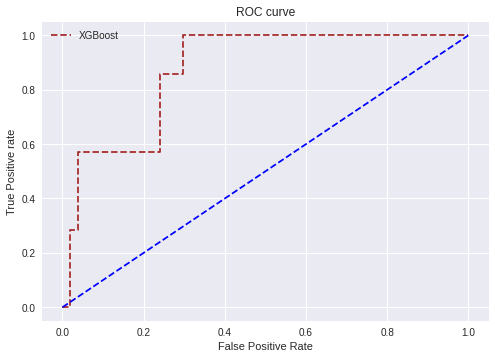

In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)
arr_2d = np.reshape(y_test, (61, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset3-RandomForest-test-results.csv")

from sklearn.metrics import roc_curve

    # roc curve for models
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
#plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
#plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
#plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
#plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='XGBoost')
#plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')



plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 88.52%
The Confusion Matrix is:
  [[54  0]
 [ 7  0]]
                precision    recall  f1-score   support

Covid Negative       0.89      1.00      0.94        54
Covid Positive       0.00      0.00      0.00         7

      accuracy                           0.89        61
     macro avg       0.44      0.50      0.47        61
  weighted avg       0.78      0.89      0.83        61

0.5714285714285714


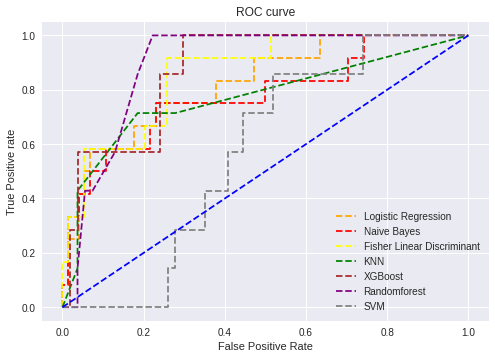

In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

arr_2d = np.reshape(y_test, (61, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset3-SVM-test-results.csv")
from sklearn.metrics import roc_curve

    # roc curve for models
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')
plt.plot(fpr7, tpr7, linestyle='--',color='grey', label='SVM')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
!pip3 install pandas_ml
!pip3 install scikit-learn==0.21
!pip3 install pandas==0.24.2

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


AUC Score is  0.8925339366515836 

CONFUSION MATRIX -
 Predicted  False  True  __all__
Actual                         
False         94    10      104
True           2    15       17
__all__       96    25      121 

population: 121
P: 17
N: 104
PositiveTest: 25
NegativeTest: 96
TP: 15
TN: 94
FP: 10
FN: 2
TPR: 0.8823529411764706
TNR: 0.9038461538461539
PPV: 0.6
NPV: 0.9791666666666666
FPR: 0.09615384615384616
FDR: 0.4
FNR: 0.11764705882352941
ACC: 0.9008264462809917
F1_score: 0.7142857142857143
MCC: 0.6747890849744113
informedness: 0.7861990950226243
markedness: 0.5791666666666666
prevalence: 0.14049586776859505
LRP: 9.176470588235293
LRN: 0.13016270337922403
DOR: 70.5
FOR: 0.020833333333333332


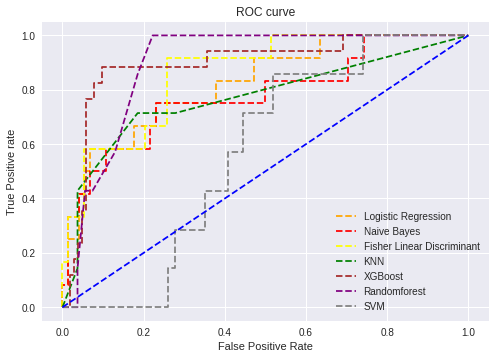

In [ ]:
from pandas_ml import ConfusionMatrix
dataset = pd.read_csv('/content/Dataset-3 (1).csv')

total_neg_samples=sum(dataset['SARS-Cov-2_exam_result']==0)
total_pos_samples=sum(dataset['SARS-Cov-2_exam_result']==1)
scale_pos_weight = total_neg_samples / total_pos_samples

dataset.reset_index(inplace = True)

y = dataset[['SARS-Cov-2_exam_result']]

X = dataset
X.drop(labels=None, axis=1, columns=['SARS-Cov-2_exam_result','index','Patient_ID','Unnamed: 0'], level=None, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, scale_pos_weight = scale_pos_weight)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

y_pred = model.predict(X_test)
test_probs = model.predict_proba(X_test)
test_probs = test_probs[:, 1]
auc = roc_auc_score(y_test, test_probs)
print('AUC Score is ', (auc), '\n')
from sklearn.metrics import roc_curve
arr_2d = np.reshape(y_test, (121, 1))
new_np = np.hstack((X_test,arr_2d))
test_probs = np.reshape(test_probs,(121,1))
finaltocsv= np.hstack((new_np,test_probs))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset3-XGBoost(Improved)-test-results.csv")
    # roc curve for models
fpr8, tpr8, thresh8 = roc_curve(y_test, test_probs, pos_label=1)
pred = pd.DataFrame(y_pred, columns=['SARS-Cov-2_exam_result'])
test = pd.DataFrame(y_test, columns=['SARS-Cov-2_exam_result'])
test.reset_index(inplace = True)
test.drop(labels=None, axis=1, columns=['index'], level=None, inplace=True)

CM = ConfusionMatrix(test['SARS-Cov-2_exam_result'], pred['SARS-Cov-2_exam_result'])

print('CONFUSION MATRIX -\n',(CM), '\n')
CM.print_stats()
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr8, tpr8, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')
plt.plot(fpr7, tpr7, linestyle='--',color='grey', label='SVM')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();